# Case Study - Cardio Good Fitness

### **Overview**

In this case study, we are going to investigate product preferences across different types of customers and identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness.

### **Problem Statement**

Cardio Good Fitness is a sports equipment company. Its time that they re-invent one of their product lines: the treadmill, based on the current socio-eco lifestyle. They would like to identify the profile of the typical customer for each treadmill product.

### **Requirement**

You are from AdRight, a market research organisation. You are assigned the task to identify the profile of the typical customer for each treadmill product offered by Cardio Good Fitness. You are required to investigate whether there are differences across the product lines with respect to customer characteristics.

### **Data Description**

1. product purchased (Values: TM195, TM498, or TM798)
2. gender
3. age, in years
4. education, in years
5. relationship status (Values: single or partnered)
6. annual household income
7. average number of times the customer plans to use the treadmill each week
8. average number of miles the customer expects to walk/run each week
9. self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

data_path = 'CardioGoodFitness.csv'

data = pd.read_csv(data_path)

print(data.dtypes)

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


In [2]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


**Data Types and Level of measurements(LoM)**

| Variable | Data Type | LoM |
| :--: | :--: | :--: |
| Product | category | nominal |
| Age | discrete | ratio |
| Gender | category | nominal |
| Education | discrete | ratio |
| MartialStatus | category | nominal |
| Usage | discrete | ratio |
| Fitness | category | ordinal |
| Income | continuous | interval |
| Miles | continuous | ratio |


In [3]:
def plot_pareto(data, column_name):
  freq_df = data[column_name].value_counts().to_frame().reset_index()
  freq_df.columns = [column_name, 'freq']
  freq_df = freq_df.sort_values('freq', ascending  = False)
  freq_df['rel_freq'] = (freq_df['freq']/freq_df['freq'].sum())*100
  freq_df['cum_freq'] = freq_df['rel_freq'].cumsum()

  fig, ax = plt.subplots()
  ax.bar(freq_df[column_name].astype(str), freq_df['freq'])
  fig.suptitle(column_name, fontsize=16)
  ax2 = ax.twinx()
  ax2.plot(freq_df[column_name].astype(str), freq_df['cum_freq'], color="C1", marker="D", ms=7)

  ax.tick_params(axis = 'x', rotation = 90)
  ax.tick_params(axis="y", colors="C0")
  ax2.tick_params(axis="y", colors="C1")
  ax2.set_yticks(np.arange(0,101,10))
  plt.show()
  plt.close()

def plot_hist(data, column_name, bin_size):
  col_val = data[column_name].values
  x_labels = np.arange(min(col_val), max(col_val), bin_size)
  uniq_prod = np.unique(data['Product'])
  for prod in uniq_prod:
    temp_data = data[data['Product'] == prod]
    print('Product:', prod)
    price = temp_data[column_name].values
    
    (n, bins, rects) = plt.hist(price, bins=x_labels)
    n = np.round(n/sum(n)*100, 2)
    for rect, label in zip(rects, n):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
                ha='center', va='bottom')
    plt.xticks(x_labels, rotation = 90)
    plt.xlabel(column_name)
    plt.title(column_name)
    plt.ylabel('Frequency')
    plt.show()
    plt.close()

def cat_multicol_bar_chart(data, col1, col2, col3):
  pvt_data = data.pivot_table(values = col3, index = col1, columns = col2, aggfunc='count')
  pvt_data.plot.bar(figsize = (10,5), legend = 'reverse')

def num_multicol_bar_chart(data, col1, col2):
  pvt_data = data.pivot_table(values = col1, index = col2, aggfunc=['mean','median'])
  pvt_data.plot.bar(figsize = (10,5), legend = 'reverse')
  plt.title(col1)
  plt.show()
  plt.close()

#### Frequency Distribution of each variable

**Categorical columns**

note: Here Education and Usage are included in categorical columns as both have less that 10 unique integers.

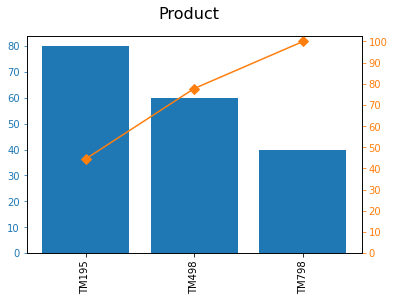

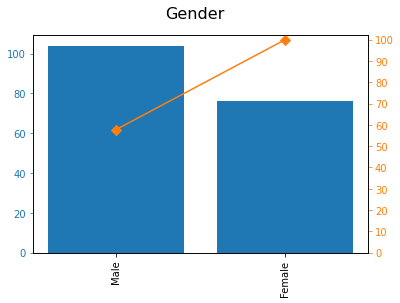

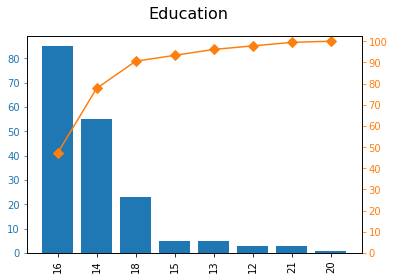

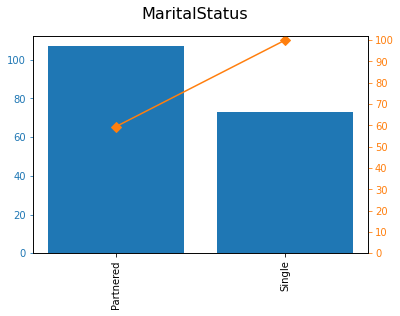

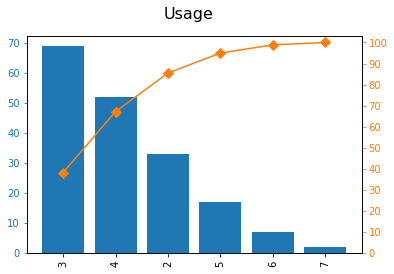

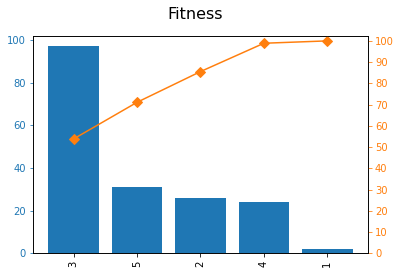

In [4]:
pareto_cols = ['Product','Gender','Education','MaritalStatus','Usage','Fitness']

for col in pareto_cols:
  plot_pareto(data, col)

**Numerical columns**

Product: TM195


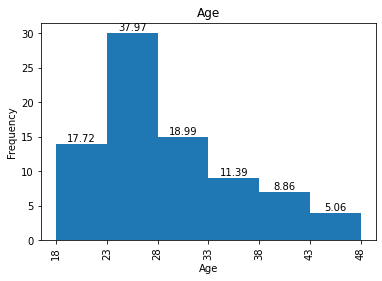

Product: TM498


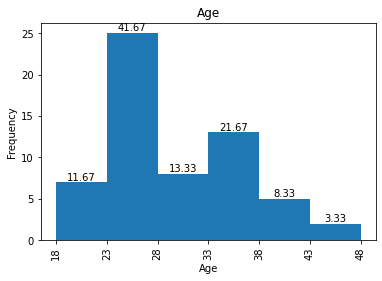

Product: TM798


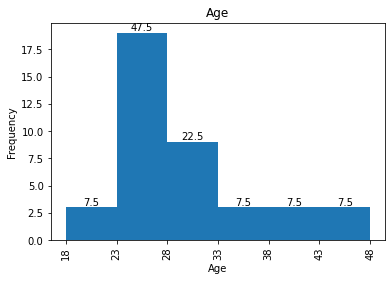

Product: TM195


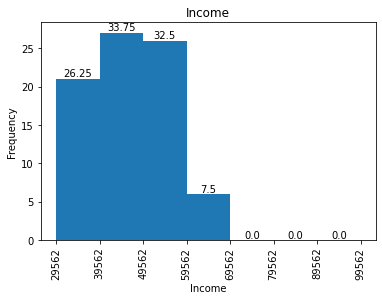

Product: TM498


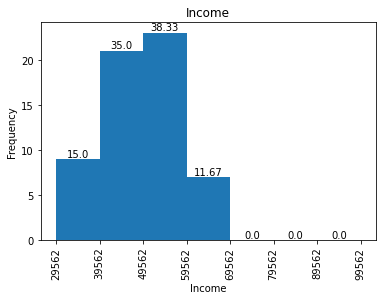

Product: TM798


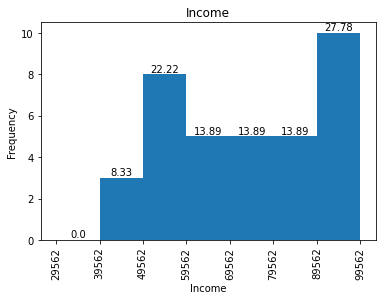

Product: TM195


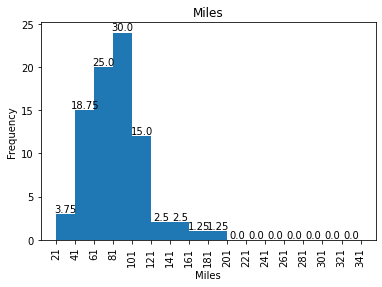

Product: TM498


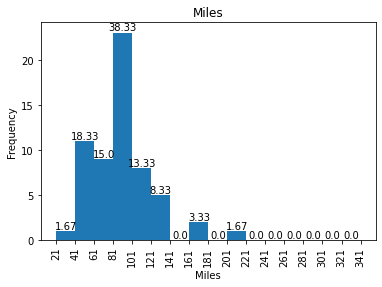

Product: TM798


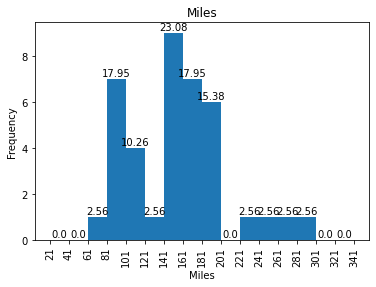

In [5]:
hist_cols = {'Age':5, 'Income':10000, 'Miles':20}
for key, value in hist_cols.items():
    plot_hist(data, key, value)

#### Bivariate Analysis

Comparing both categorical and numerical columns with each Product type

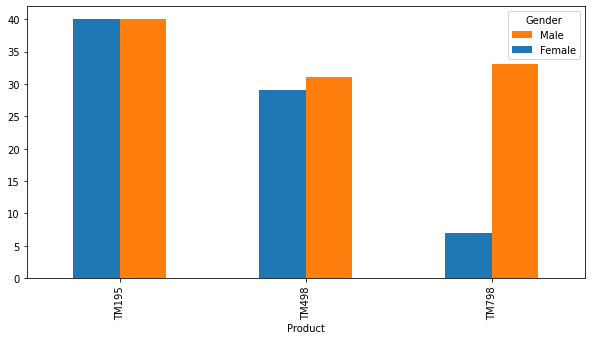

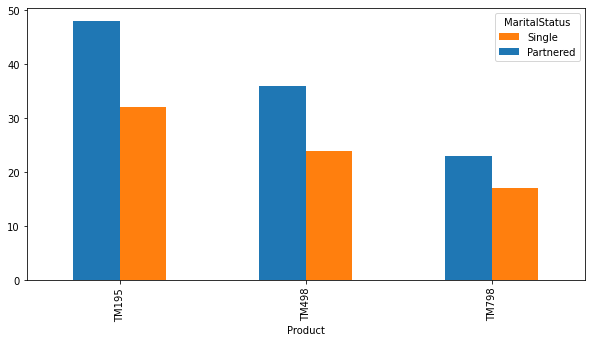

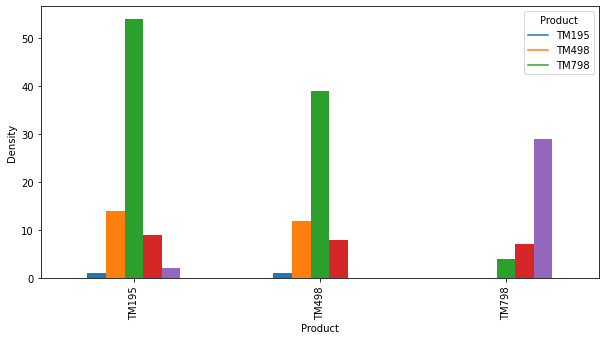

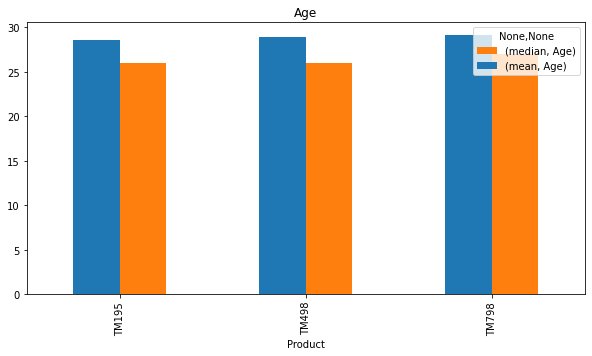

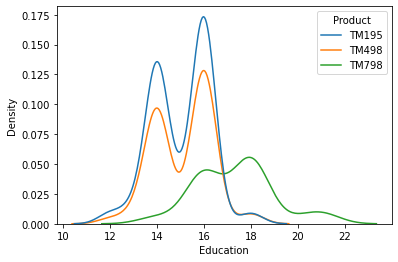

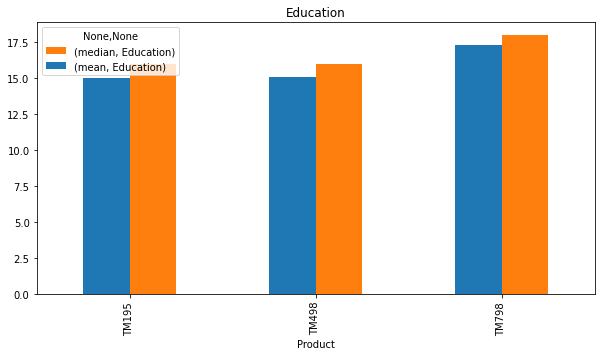

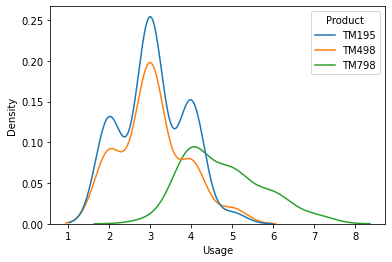

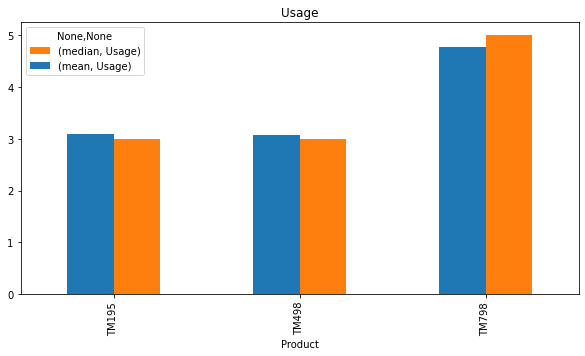

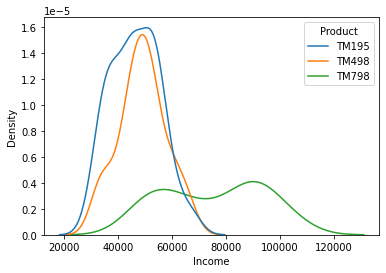

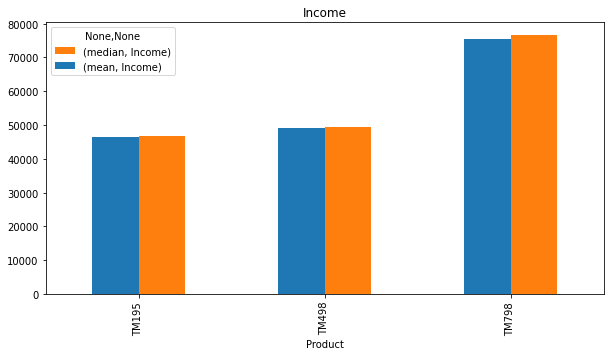

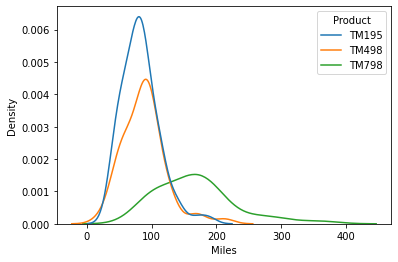

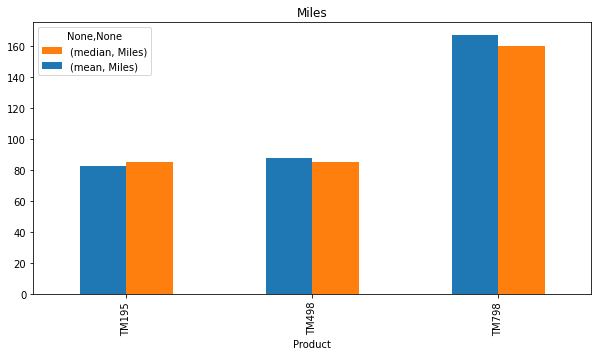

In [6]:
cat_cols = ['Gender','MaritalStatus','Fitness']
for col in cat_cols:
  cat_multicol_bar_chart(data, 'Product', col, 'Age')

num_cols = ['Age','Education','Usage','Income','Miles']
for col in num_cols:
  sb.kdeplot(data = data, x = col, hue = 'Product')
  plt.show()
  plt.close()
  num_multicol_bar_chart(data, col, 'Product')

Comparing categorical and numerical variables


 Gender 



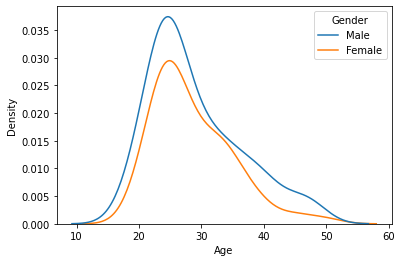

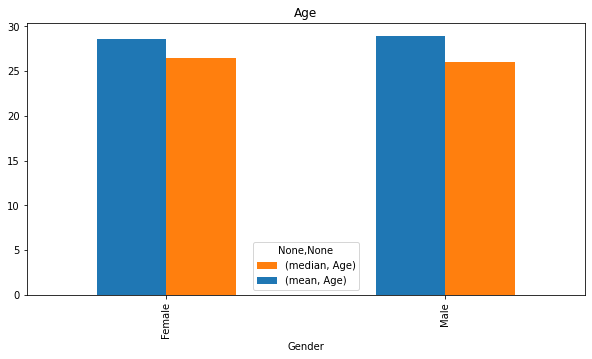

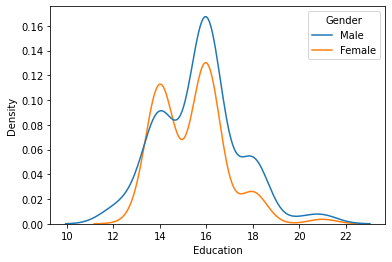

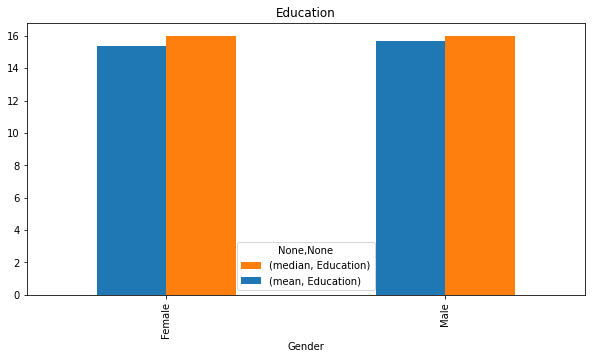

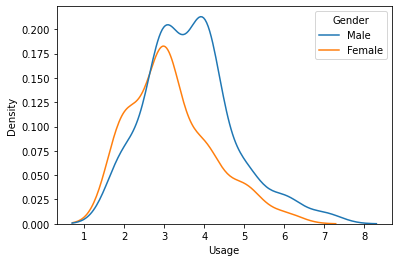

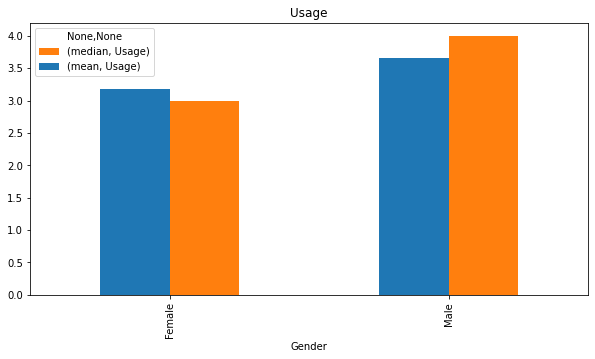

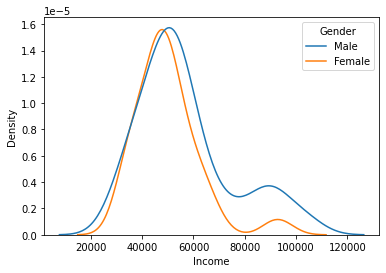

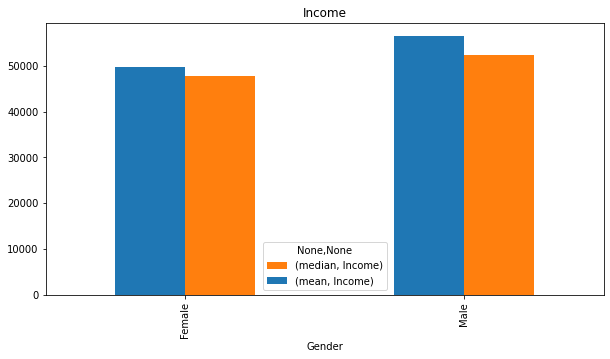

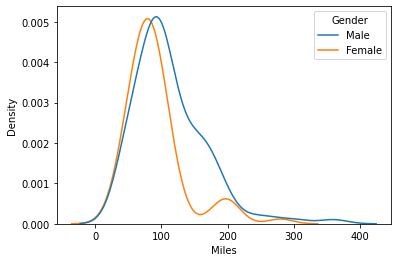

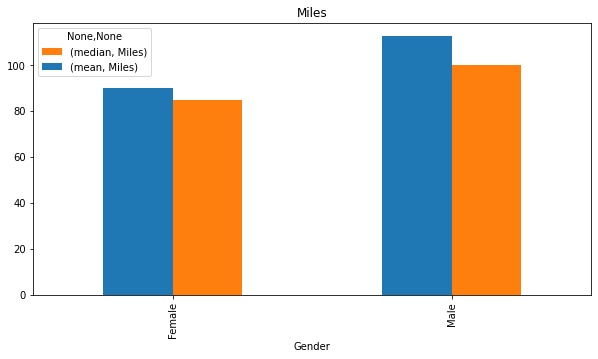


 MaritalStatus 



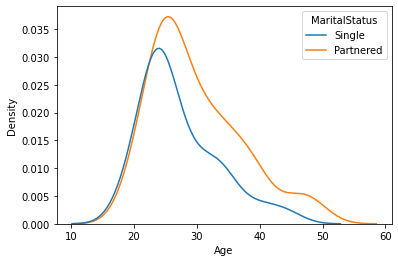

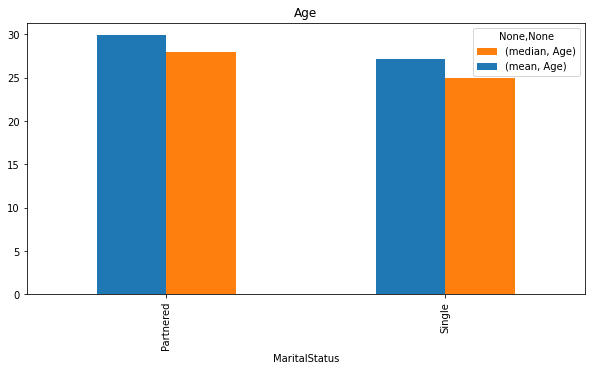

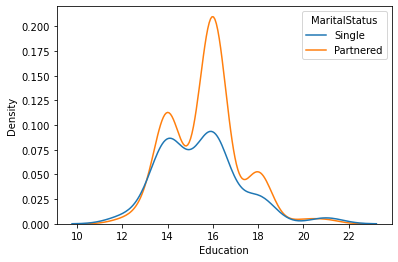

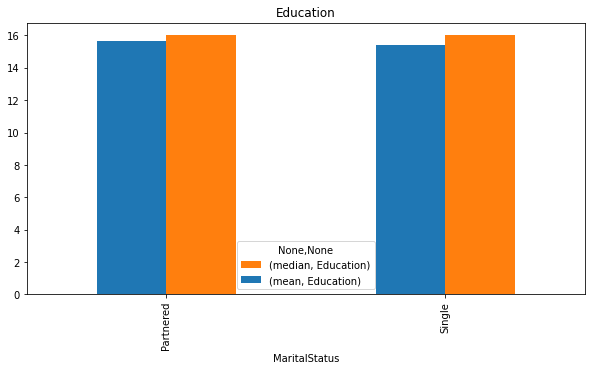

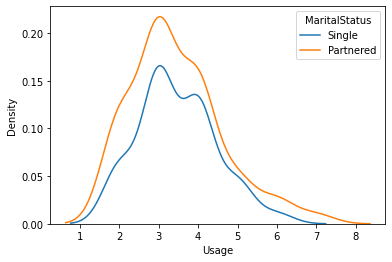

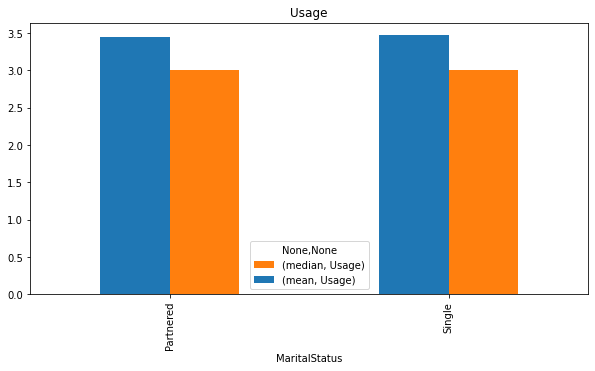

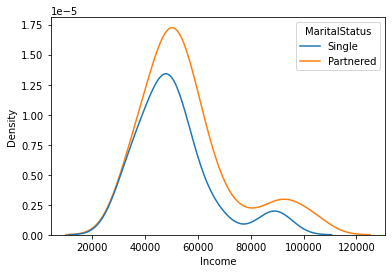

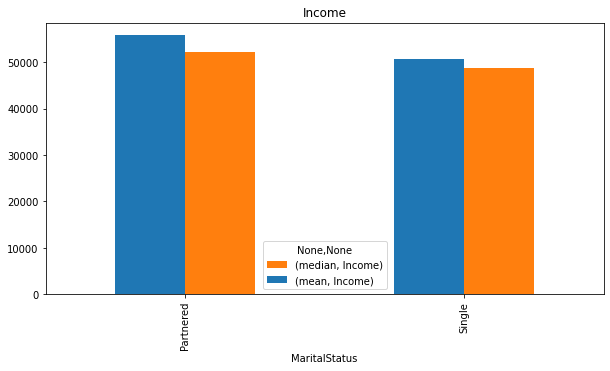

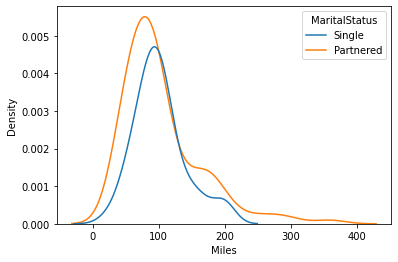

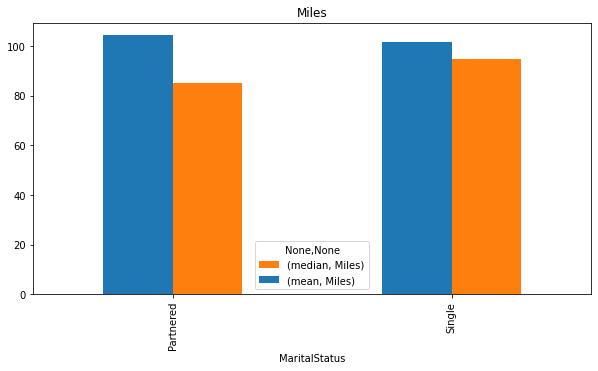


 Fitness 



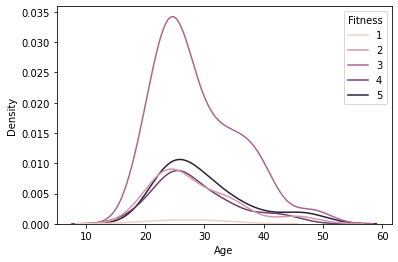

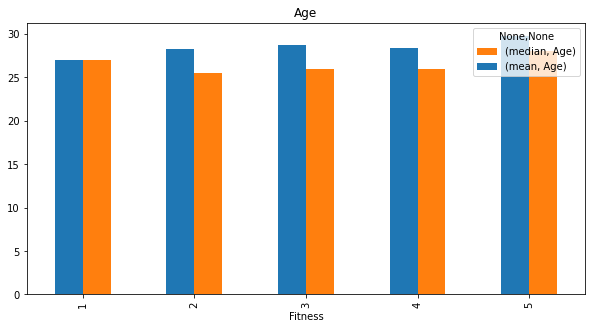

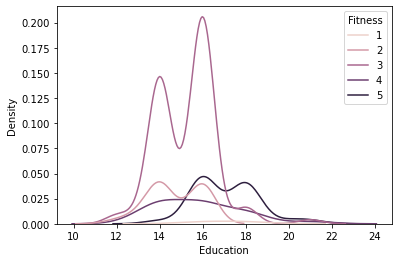

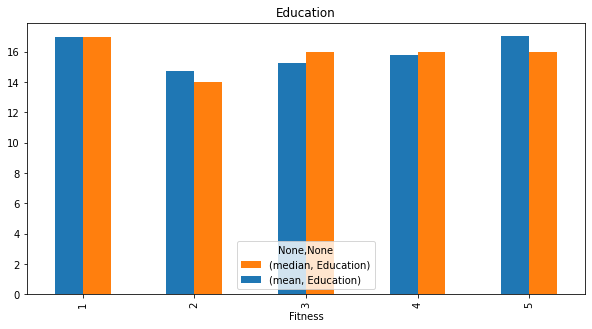

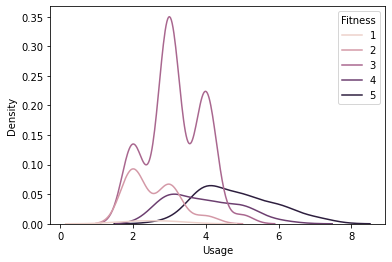

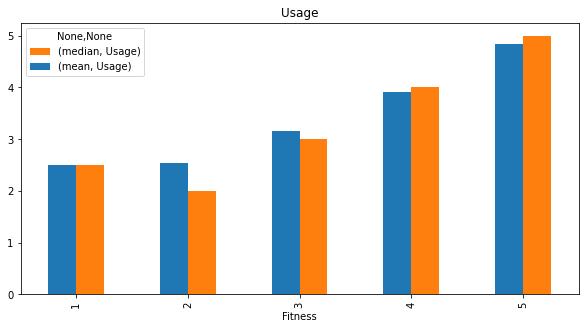

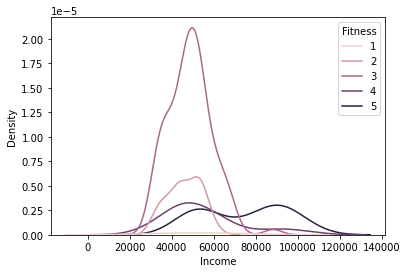

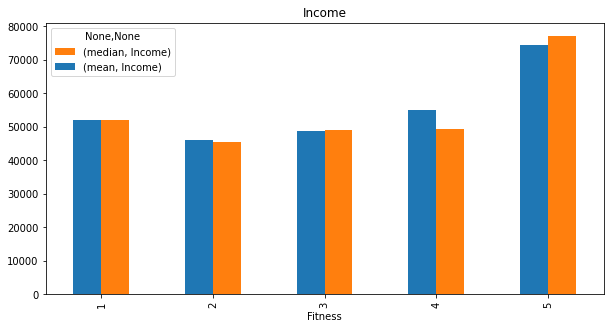

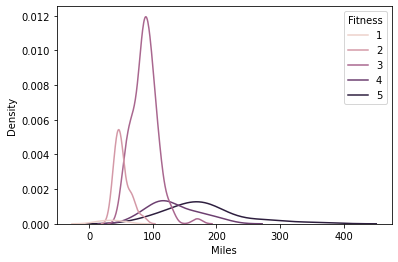

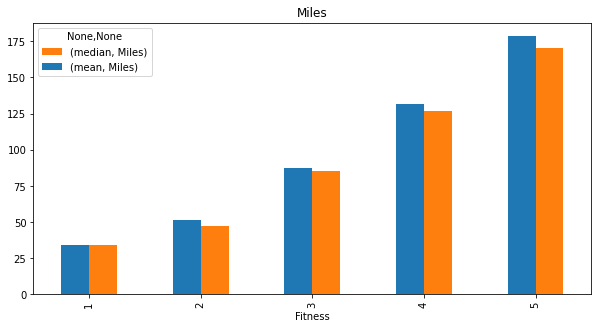

In [7]:
for cat_col in cat_cols:
  print('\n '+cat_col+' \n')
  for num_col in num_cols:
    sb.kdeplot(data = data, x = num_col, hue = cat_col)
    plt.show()
    plt.close()
    num_multicol_bar_chart(data,num_col, cat_col)

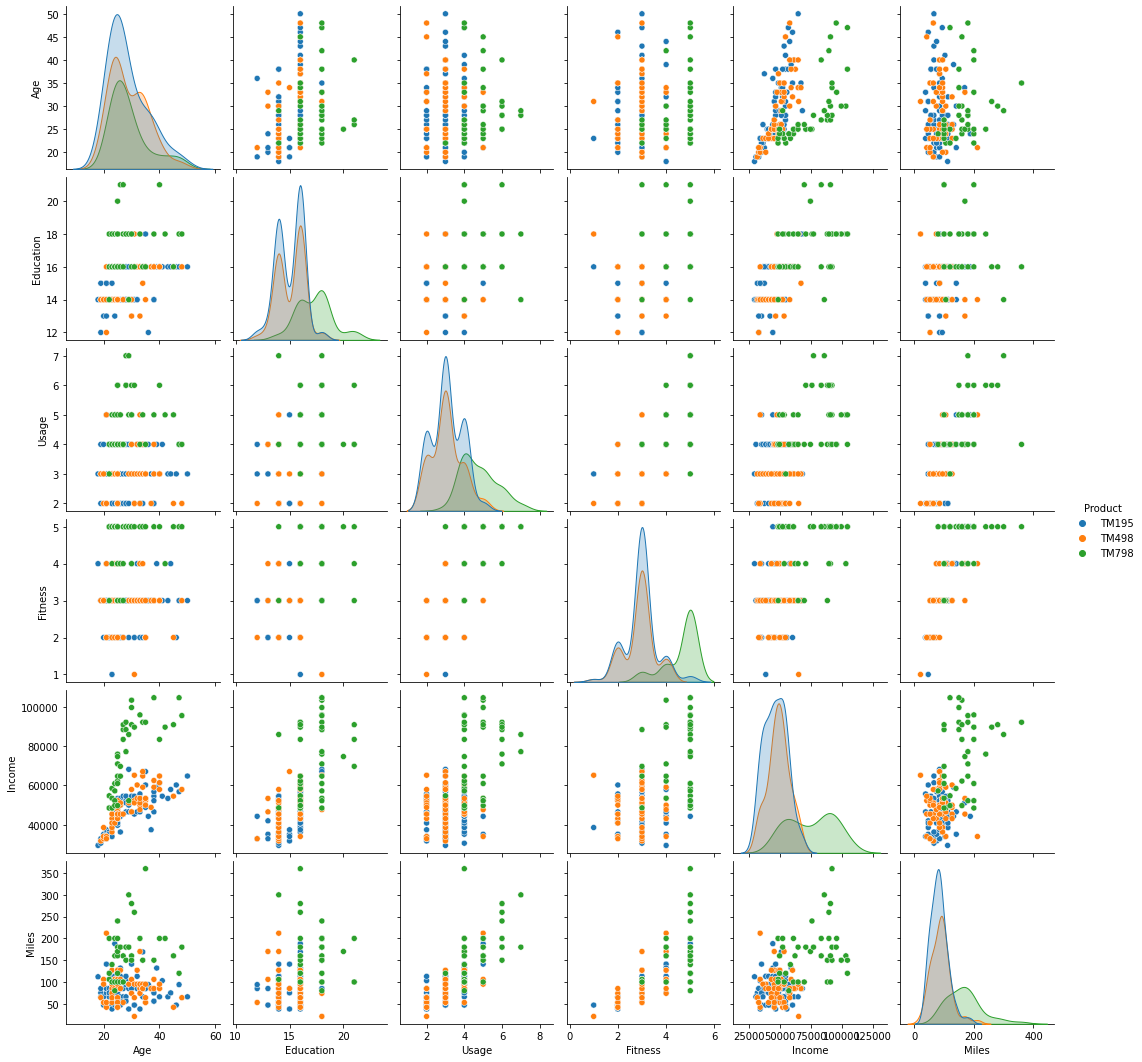

In [8]:
sb.pairplot(data, hue = 'Product')

**Statistical Data** 

In [9]:
data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


**Multi-Variate Analysis**

<AxesSubplot:>

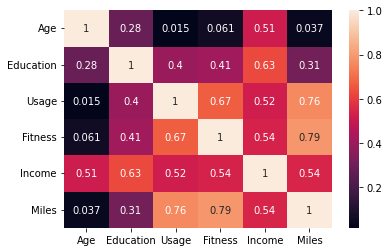

In [10]:
sb.heatmap(data.corr(), annot=True)

- Understandably **Miles walked/ran** is positively correlated with **Fitness score**
- Similarly **Miles walked/ran** is also positively correlated with **Average Usage**

### Conclusion

| Variable/Product | TM195 | TM498 | TM798 |
| :--: | :--: | :--: | :--: |
| Age | [20,30] | [20,30] | [20,30] |
| Gender | M/F | M/F | M |
| Education | [14,16] | [14,16] | [16,18] |
| MaritalStatus | P | P | P |
| Usage | 3 | 3 | [4,5] |
| Fitness | 3 | 3 | 5 |
| Income | [39562, 59562] | [39562, 59562] | [79562, 99562] |
| Miles | [61,101] | [41,101] | [141,201] |
